In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abhijitpaul0212/DataSets/main/StudentsPerformance.csv")
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
455,male,group C,bachelor's degree,free/reduced,none,37,56,47
199,female,group B,bachelor's degree,free/reduced,none,78,79,76
475,female,group D,bachelor's degree,standard,completed,71,76,83
41,female,group C,associate's degree,standard,none,58,73,68
116,female,group B,bachelor's degree,free/reduced,none,75,85,82


In [3]:
# Create a new feature

total_score = df['math score'] + df['reading score'] + df['writing score']

df['average score'] = round(total_score/ 3, 2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [4]:
df.iloc[:, 5]

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [5]:
# Define Numerical & Categorical features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))
print()

for feature in categorical_features:
    print("'{0}' feature has {1} unique values: {2}\n".format(feature, df[feature].nunique(), df[feature].unique()))

We have 4 numerical features: ['math score', 'reading score', 'writing score', 'average score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

'gender' feature has 2 unique values: ['female' 'male']

'race/ethnicity' feature has 5 unique values: ['group B' 'group C' 'group A' 'group D' 'group E']

'parental level of education' feature has 6 unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

'lunch' feature has 2 unique values: ['standard' 'free/reduced']

'test preparation course' feature has 2 unique values: ['none' 'completed']



In [6]:
# Separating Independant and Dependant features

# X = df.iloc[:, :5]
# y = df.iloc[:, 5]
X = df.drop(columns=['math score', 'average score'], axis=1)
y = df['math score']

In [7]:
# Create column transformer with 3 sub transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
# seperate the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [10]:
# Create an Evaluate Function to give all metrics after model Training

def evaluate_model(actual, predicted):
    mae = mean_absolute_error(y_true=actual, y_pred=predicted)
    mse = mean_squared_error(y_true=actual, y_pred=predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_true=actual, y_pred=predicted)
    return mae, rmse, r2_square

In [11]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "XGBoostRegressor": XGBRegressor()

}
result_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_mae, train_rmse, train_r2 = evaluate_model(actual=y_train, predicted=train_pred)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))

    print('----------------------------------')
    
    test_pred = model.predict(X_test)
    test_mae, test_rmse, test_r2 = evaluate_model(actual=y_test, predicted=test_pred)
    
    ('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))
    
    result_list.append((name, test_r2))

    print('='*35)
    print('\n')
    


Model performance for Training set
- Root Mean Squared Error: 5.3173
- Mean Absolute Error: 4.2486
- R2 Score: 0.8807
----------------------------------
- Root Mean Squared Error: 5.3941
- Mean Absolute Error: 4.2731
- R2 Score: 0.8548


Model performance for Training set
- Root Mean Squared Error: 6.5752
- Mean Absolute Error: 5.1826
- R2 Score: 0.8176
----------------------------------
- Root Mean Squared Error: 6.3554
- Mean Absolute Error: 5.0539
- R2 Score: 0.7984


Model performance for Training set
- Root Mean Squared Error: 5.3154
- Mean Absolute Error: 4.2455
- R2 Score: 0.8808
----------------------------------
- Root Mean Squared Error: 5.3801
- Mean Absolute Error: 4.2573
- R2 Score: 0.8556


Model performance for Training set
- Root Mean Squared Error: 6.9352
- Mean Absolute Error: 4.9490
- R2 Score: 0.7970
----------------------------------
- Root Mean Squared Error: 6.4098
- Mean Absolute Error: 4.9905
- R2 Score: 0.7950


Model performance for Training set
- Root Mean S

In [12]:
result_list

[('LinearRegression', 0.8548109467131692),
 ('Lasso', 0.798449840729279),
 ('Ridge', 0.855562555768163),
 ('SVR', 0.7949860684574759),
 ('KNeighborsRegressor', 0.7595146981259271),
 ('DecisionTreeRegressor', 0.6070420068352236),
 ('RandomForestRegressor', 0.8137157720281439),
 ('AdaBoostRegressor', 0.7872672349875516),
 ('CatBoostRegressor', 0.828296713382709),
 ('XGBoostRegressor', 0.8007270176209718)]

In [13]:
result_df = pd.DataFrame(result_list, columns=['Model Name', 'R2 Score']).sort_values(by='R2 Score',ascending=False)
result_df

,Model Name,R2 Score
2,Ridge,0.855563
0,LinearRegression,0.854811
8,CatBoostRegressor,0.828297
6,RandomForestRegressor,0.813716
9,XGBoostRegressor,0.800727
1,Lasso,0.798450
3,SVR,0.794986
7,AdaBoostRegressor,0.787267
4,KNeighborsRegressor,0.759515
5,DecisionTreeRegressor,0.607042


In [14]:
# Ridge Regression

lin_model = Ridge(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.56


Text(0, 0.5, 'Predicted')

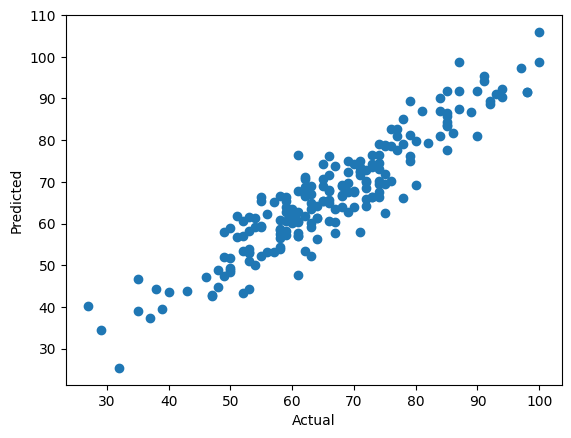

In [15]:
# Plot Actual vs Predicted

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

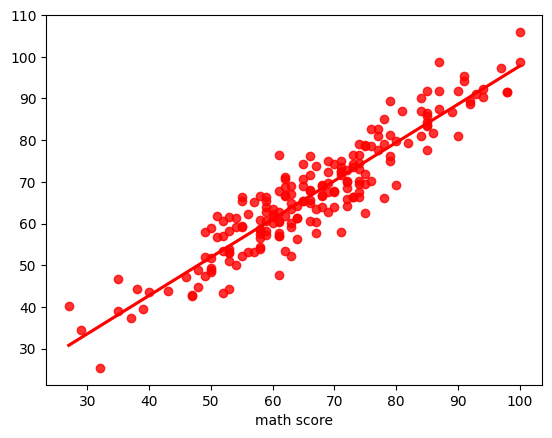

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
219,61,60.429342,0.570658
522,69,62.694412,6.305588
833,77,77.612094,-0.612094
484,49,47.437321,1.562679
670,66,60.674175,5.325825
...,...,...,...
835,60,61.576078,-1.576078
938,85,86.420347,-1.420347
873,90,91.693915,-1.693915
757,70,74.323581,-4.323581
